In [1]:
#Libraries for handling data

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import classifier libraries 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

print('modules uploaded successfully')

modules uploaded successfully


Data Preprocessing

In [2]:
df = pd.read_csv('gold_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
# Showing a Sample of Data

df.sample(1).iloc[0]

Date       5/7/2015
SPX            2088
GLD          113.42
USO            20.2
SLV            15.6
EUR/USD      1.1247
Name: 1623, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Data Cleaning

In [8]:
#check the null values

df.isnull().sum()

#No null values 

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#check if there is any duplicated values
df.duplicated().sum()


0

Data Visualization 


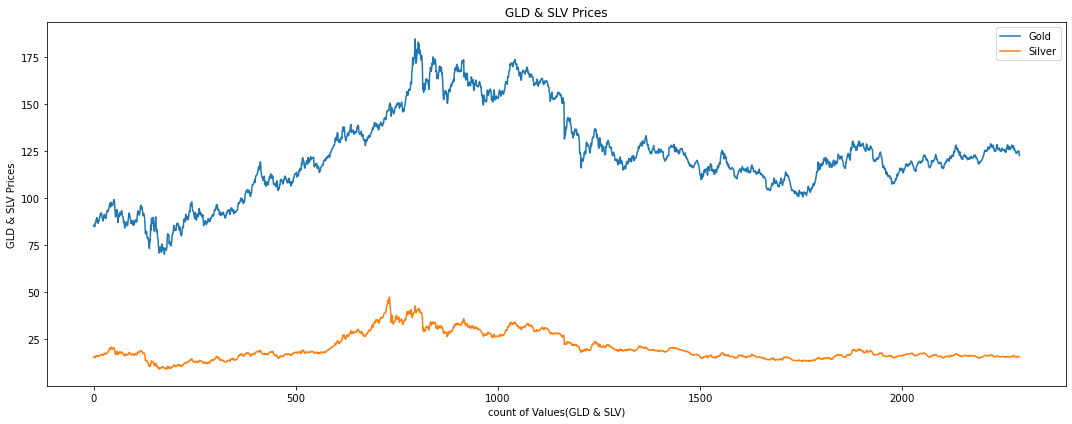

In [10]:
plt.figure(figsize=(15, 6))
df['GLD'].plot()
df['SLV'].plot()
plt.xlabel('count of Values(GLD & SLV)')
plt.ylabel('GLD & SLV Prices')
plt.title("GLD & SLV Prices")
plt.legend(['Gold', 'Silver'])
plt.tight_layout()
plt.show()

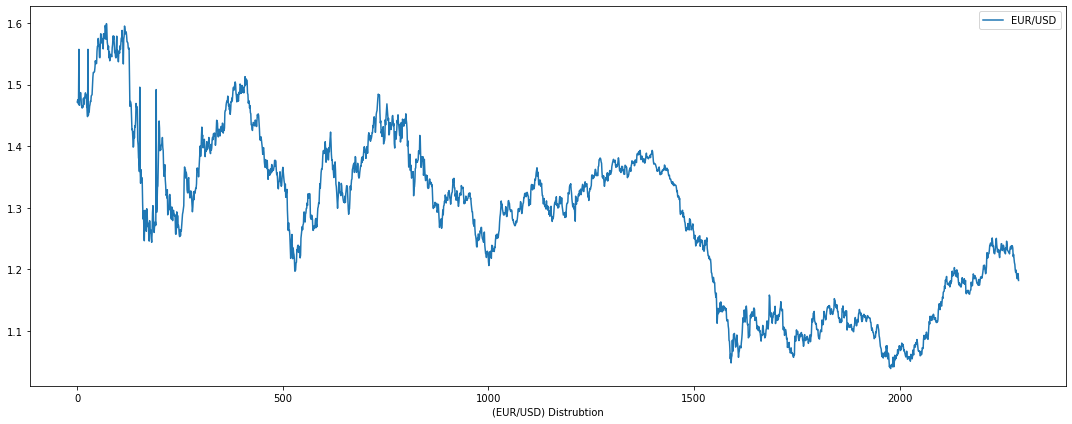

In [11]:
plt.figure(figsize=(15, 6))
df['EUR/USD'].plot()
plt.xlabel('(EUR/USD) Distrubtion')
plt.legend(['EUR/USD'])
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='GLD', ylabel='Density'>

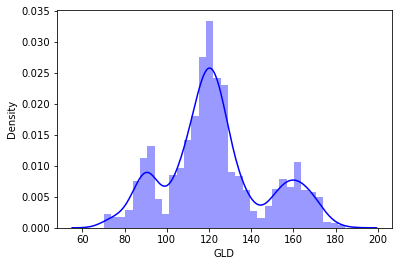

In [12]:
sns.distplot(df['GLD'], color='blue', kde=True)

<AxesSubplot:xlabel='SLV', ylabel='Density'>

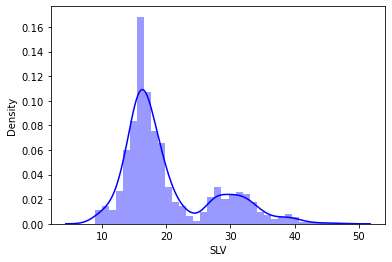

In [13]:
sns.distplot(df['SLV'], color='blue', kde=True)

<AxesSubplot:xlabel='EUR/USD', ylabel='Density'>

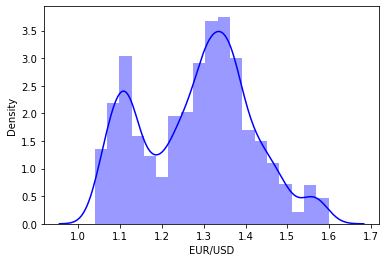

In [14]:
sns.distplot(df['EUR/USD'], color='blue', kde=True)

<AxesSubplot:xlabel='SPX', ylabel='Density'>

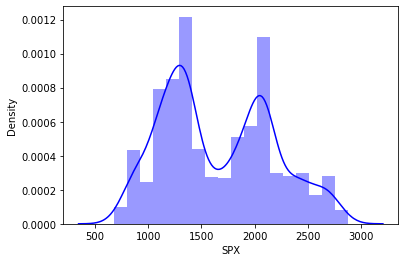

In [15]:
sns.distplot(df['SPX'], color='blue', kde=True)

spliting Data into Feature and Target variable

In [16]:
x = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Random Forest Regressor

In [18]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [19]:
# testing prediction

test_prediction = model.predict(x_test)
test_prediction

array([122.46029922, 130.51650262, 127.61649955,  96.6139974 ,
       119.06640051, 114.48529931, 124.91453936, 117.72749921,
       108.06110115,  98.18079969,  95.5568995 , 167.71359852,
       150.35550085, 116.52640081, 170.74590169,  85.32589972,
       123.08539878, 108.77609711, 113.19530094, 131.29870326,
       124.29739898, 113.61750019, 116.04450083, 108.79309987,
       108.59850144, 125.83159938, 119.25169975, 112.48109892,
       113.28560172, 125.33109866, 146.63680164,  89.55540003,
       167.62289997, 113.55559955, 108.38900073, 120.26760103,
       142.00859849, 161.18290037, 174.01009761, 153.19560168,
       119.44680112, 113.68390044, 121.3981987 , 113.68259927,
       121.99880038, 107.96830062,  88.52049875, 114.36919936,
       129.84530267, 117.92200049, 104.42500036, 129.92570245,
       107.07539878, 160.45010395, 131.66209982, 117.99559968,
       147.52270062, 134.80320251,  95.72000129, 124.69270138,
       114.7496991 ,  86.0401009 , 104.28889932, 113.86

In [21]:
# r_squared error

score = metrics.r2_score(y_test, test_prediction)
print(f"The Value of R Squared error : {score}")

The Value of R Squared error : 0.9902543310792705


In [22]:
# mean squared error

mse = metrics.mean_squared_error(test_prediction, y_test)
print(f"The Value of Mean Squared Error : {mse}")

The Value of Mean Squared Error : 5.343549252428668


Showing the actual price vs the predicted price 

In [23]:
y_test = list(y_test)

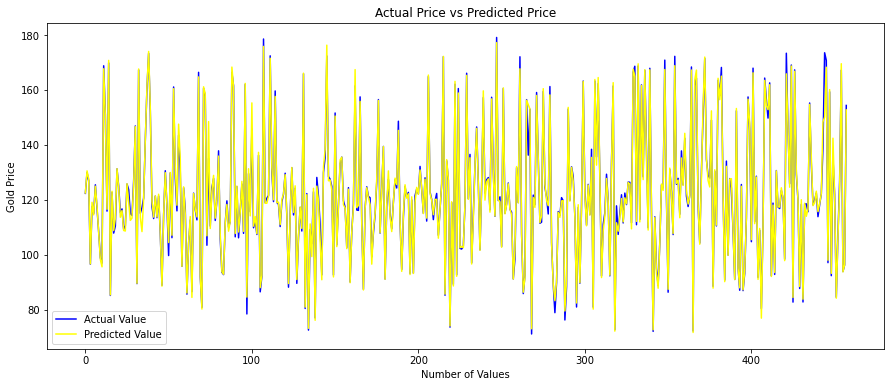

In [28]:
plt.figure(figsize=(15, 6))
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_prediction, color='yellow', label='Predicted Value')
plt.title("Actual Price vs Predicted Price")
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()